# <center>Kaggle Competition - TMDB Box Office Prediction using Random forest</center>

![Movie wallpaper](./wall_paper.jpg) *pc : wallpaperaccess.com*

## Introduction

I am writing this post to explain how to use random forest for prediction. I am using [Kaggles TMDB Box Office](https://www.kaggle.com/c/tmdb-box-office-prediction) data for this.

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

## Preparing Data

### Loading packages & data

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from datetime import datetime
import ast


# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


# Modeling Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import tree

### Settings

In [2]:
# This setting is to display all the columns in the notebook.
pd.set_option('display.max_columns', 999)

### Loading the data

In [3]:
train,test = pd.read_csv('dataset/train.csv'),pd.read_csv('dataset/test.csv')
train.index = train['id']
test.index = test['id']

In [4]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


We can see that many columns has list of dictionaries as a value, we need parse those column to get the data in tabular format. below are some of the example of such columns

## Data Cleaning

In [5]:
# I am cleaning the revenue and budget data as mentioned in the kaggle kernel 
# https://www.kaggle.com/zero92/tmdb-prediction

train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [6]:
# I am cleaning the revenue and budget data as mentioned in the kaggle kernel 
# https://www.kaggle.com/zero92/tmdb-prediction

test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

## Preprocessing Data

It looks like revenue is right skewed, that is it has few movies that make lot of money. But this distribution would have a been a probelm if we are using some other alogorithms like linear regression but Random forest will work just fine.

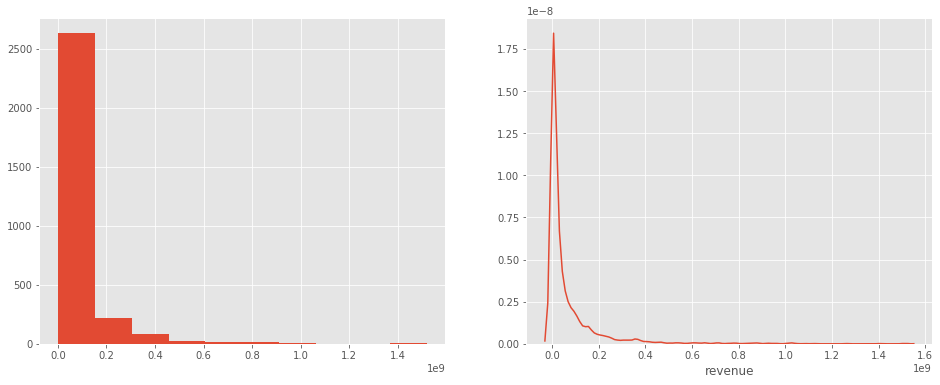

In [7]:
fig, ax = plt.subplots(figsize = (16,6))

plt.subplot(1,2,1)
plt.hist(train['revenue'])

plt.subplot(1,2,2)
sns.distplot(train['revenue'],hist=False)
plt.show()

We see a data is right skewed and since should accept the errors proportional to the predicted value. we need to take a log of revenue

In [8]:
train['log_revenue'] = np.log1p(train['revenue'])
train = train.drop(['revenue'],axis = 1)

Combined the train & test dataset as one dataframe for easy preprocessing 

In [9]:
train_rows = train.shape[0]

combined= train.append(test,ignore_index = False)

### Handling Null Values
checking null values and try to fill it if possible.

In [10]:
combined.isna().sum().sort_values(ascending=False)

belongs_to_collection    5917
homepage                 5032
log_revenue              4398
tagline                  1460
Keywords                  669
production_companies      414
production_countries      157
spoken_languages           62
crew                       38
cast                       26
genres                     23
overview                   22
runtime                     6
title                       3
status                      2
poster_path                 2
release_date                1
original_title              0
original_language           0
imdb_id                     0
popularity                  0
budget                      0
id                          0
dtype: int64

Find the missing release date and fix it.

In [11]:
combined.loc[combined['release_date'].isna(),'original_title']

id
3829    Jails, Hospitals & Hip-Hop
Name: original_title, dtype: object

In [12]:
combined.loc[combined['original_title']=='Jails, Hospitals & Hip-Hop','release_date']='5/1/00'

### Converting the 'list of dictionaries' column tabular format

In [13]:
# Production companies column is in the format of list of dictionaries
print(combined['original_title'][1]," was produced by \n",[x['name'] for x in ast.literal_eval(combined['production_companies'][1])])

Hot Tub Time Machine 2  was produced by 
 ['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)']


Below are all the columns that needs to be fixed since these contain the dictionary data format

In [14]:
dict_column = ['belongs_to_collection','genres','spoken_languages','Keywords',
               'cast','crew','production_companies','production_countries']

In [15]:
def text_to_dict(df,columns):
    '''
    Converts the dictionary that is stored as string back as dictionary
    '''
    for col in columns:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

In [16]:
combined = text_to_dict(combined,dict_column)

Next convert Dictionary columns to meaning full column(s)

In [17]:
selected_columns = ['budget',
                    'original_language',
                    'popularity',
                    'belongs_to_collection',
                    'release_date',
                    'tagline',
                    'genres',
                    'cast',
                    'production_companies',
                    'log_revenue']

In [18]:
combined = combined[selected_columns]

#### Leading Actor

From the cast lets extract the first actor which is a leading actor of the flim.

In [19]:
# Extract Leading actor
combined['leading_actor'] = combined.loc[:,'cast'].apply(lambda x : x[0]['name'] if len(x)!=0 else '')
combined= combined.drop(['cast'],axis = 1)

#### Main Production Company
From the production company dict lets extract the first production company which is main production company of the flim.

In [20]:
# Extracting production_companies
combined['leading_production'] = combined.loc[:,'production_companies'].apply(lambda x : x[0]['name'] if len(x)!=0  else '')
combined= combined.drop(['production_companies'],axis = 1)

#### Main Genere

From the genere dict lets extract the first genere  which is main genere company of the flim.


In [21]:
# Extract Main genere
combined['main_genre'] = combined.loc[:,'genres'].apply(lambda x : x[0]['name'] if len(x)!=0 else '')
combined= combined.drop(['genres'],axis = 1)

#### Release Date Features

From the release data , extract the year and month 

In [22]:
# Convert the relase date as date column & extract year

combined['year'] = combined['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').year)
combined['month'] = combined['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').month)
combined['year'] = combined['year'].apply(lambda x : x - 100 if x > 2020 else x)

combined= combined.drop(['release_date'],axis = 1)

#### Belongs to collection

In [23]:
(combined['belongs_to_collection'].apply(lambda x : len(x) if x!={} else 0)).value_counts()

0    5917
1    1481
Name: belongs_to_collection, dtype: int64

Since atmost each is move part of only one collection, create a flag to indicate if the movie belongs to a collection

In [24]:
combined['is_collection'] = combined['belongs_to_collection'].apply(lambda x : 1 if x != {} else 0)

Also create a column 'collection_name' for the top 1000 movies with collections based on number of movies in a collection

In [25]:
vc = pd.DataFrame(combined['belongs_to_collection'].apply(lambda x : x[0]['name'] if x !={} else 'NA').value_counts())
movie_collection_list = list(vc.query('belongs_to_collection>1 and belongs_to_collection < 1000').index)

In [26]:
combined['collection_name'] = combined['belongs_to_collection'].apply( 
                                lambda x: x[0]['name'] if (x!={} and x[0]['name'] in movie_collection_list) else 'NA')
combined = combined.drop(['belongs_to_collection'],axis = 1)

#### has tagline

In [27]:
combined.loc[combined['tagline'].isnull(),'tagline'] = 'NaN'
combined['has_tagline'] = combined['tagline'].apply(lambda x : 1 if x != 'NaN' else 0)
combined = combined.drop(['tagline'],axis = 1)

#### Original Language

In [28]:
# oneHot encoding - Original_language

combined['original_language'] = combined['original_language'].apply(lambda x: x if x == 'en' else 'non_en')

en_original_language_fit = OneHotEncoder(handle_unknown='ignore').fit(combined[['original_language']])
en_original_language = pd.DataFrame(en_original_language_fit.transform(combined[['original_language']]).toarray())
combined= combined.join(en_original_language,rsuffix='_original_language')

combined = combined.drop(['original_language'],axis = 1)

#### Collection Name

In [29]:
# Top 10 Collection Name based on movie count
list(combined['collection_name'].value_counts().index)[1:20]

['James Bond Collection',
 'Friday the 13th Collection',
 'Pokémon Collection',
 'Halloween Collection',
 'Star Wars Collection',
 'The Fast and the Furious Collection',
 'Harry Potter Collection',
 'The Pink Panther (Original) Collection',
 'A Nightmare on Elm Street Collection',
 'Rocky Collection',
 'Saw Collection',
 'Police Academy Collection',
 'The Muppet Collection',
 'Star Trek: The Original Series Collection',
 'Paranormal Activity Collection',
 'X-Men Collection',
 'Resident Evil Collection',
 'The Bourne Collection',
 'The Jack Ryan Collection']

In [30]:
# oneHot encoding - Collection_name

popular_collection = list(combined['collection_name'].value_counts()[1:20].index)

combined['collection_name'] = combined['collection_name'].apply(lambda x : x if x in popular_collection else 'other')

en_collection_name = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['collection_name']]).toarray())
combined= combined.join(en_collection_name,rsuffix='_collection_name')

combined = combined.drop(['collection_name'],axis = 1)

#### Month

In [31]:
# oneHot encoding - Month
en_month = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['month']]).toarray())
combined= combined.join(en_month,rsuffix='_month')

combined = combined.drop(['month'],axis = 1)

#### Leading Actor

In [32]:
# oneHot encoding - Leading Actor
popular_leading_actor = list(combined['leading_actor'].value_counts()[1:30].index)

combined['leading_actor'] = combined['leading_actor'].apply(lambda x : x if x in popular_leading_actor else 'other')

en_leading_actor = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['leading_actor']]).toarray())
combined= combined.join(en_leading_actor,rsuffix='_leading_actor')

combined = combined.drop(['leading_actor'],axis = 1)

#### Main genere

In [33]:
# oneHot encoding - Main genre
popular_genre  = list(combined['main_genre'].value_counts()[0:15].index)

combined['main_genre'] = combined['main_genre'].apply(lambda x : x if x in popular_genre else 'other')

en_genre = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['main_genre']]).toarray())
combined= combined.join(en_genre,rsuffix='_main_genre')

combined = combined.drop(['main_genre'],axis = 1)

#### Leading Production

In [34]:
# oneHot encoding - Leading Production
popular_production = list(combined['leading_production'].value_counts()[1:11].index)

combined['leading_production'] = combined['leading_production'].apply(lambda x : 'big_producer' if x in popular_production else 'small_producer')

en_production = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['leading_production']]).toarray())
combined= combined.join(en_production,rsuffix='_leading_production')

combined = combined.drop(['leading_production'],axis = 1)

## Modeling

In [35]:
train1 = combined.loc[:train_rows-1,]
test1 = combined.loc[train_rows:,]

In [36]:
train_trainX,train_validX,train_trainY,train_validY = train_test_split(train1,train1['log_revenue'],test_size = 0.2)

In [37]:
train_trainX = train_trainX.drop(['log_revenue'],axis=1)
train_validX = train_validX.drop(['log_revenue'],axis=1)
test1 = test1.drop(['log_revenue'],axis=1)

Checking the performance of baseline model with default hyperparameters

In [52]:
regr = RandomForestRegressor()

In [53]:
# default hyper parameters 
from pprint import pprint
pprint(regr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [54]:
model = regr.fit(train_trainX,train_trainY)

In [55]:
def evaluate(df):
    """
    Evaluation is based on RMSE.
    This expects a dataframe with Actual & Prdicetd column
    """
    return np.sqrt(metrics.mean_squared_error(np.exp(df['Predicted']),np.exp(df['Actual'])))

In [56]:
train1_train_prediction = pd.DataFrame({'Predicted': model.predict(train_trainX),'Actual': train_trainY})

# Train Error 
evaluate(train1_train_prediction)

43014592.036196925

In [57]:
train1_valid_prediction = pd.DataFrame({'Predicted': model.predict(train_validX),'Actual': train_validY})

# Valid Error 
evaluate(train1_valid_prediction)

67611774.21677399

Base randomforest model on average predicts the revenue with \\$67.6M error

Now Use the Random Search to find the optimzed hyper parameter.

In [58]:
regr = RandomForestRegressor()

In [59]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10,20,40]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
random_search = RandomizedSearchCV(regr, param_distributions=random_grid,
                                   n_iter=30, cv=5, random_state=42)

In [46]:
model_random_search = random_search.fit(train_trainX,train_trainY)

In [47]:
model_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 26}

In [48]:
regr = RandomForestRegressor(n_estimators= 100,
 min_samples_split= 10,
 min_samples_leaf=2,
 max_features = 'auto',
 max_depth= 26)

In [49]:
model = regr.fit(train_trainX,train_trainY)

In [50]:
train1_train_prediction = pd.DataFrame({'Predicted': model.predict(train_trainX),'Actual': train_trainY})

# Train Error 
np.sqrt(metrics.mean_squared_error(np.exp(train1_train_prediction['Predicted']),np.exp(train1_train_prediction['Actual'])))

63565672.46811557

In [51]:
train1_valid_prediction = pd.DataFrame({'Predicted': model.predict(train_validX),'Actual': train_validY})

# Valid Error 
np.sqrt(metrics.mean_squared_error(np.exp(train1_valid_prediction['Predicted']),np.exp(train1_valid_prediction['Actual'])))

66280935.10666514

Base randomforest model on average predicts the revenue with \\$ 66.2M error, which is better than base model.
Even though it is not a big improvement, predicting the revenue within $66.2M is good enough for a movie.